# **Cost of Living Analysis**

**Abstract**

This project focuses on analyzing a dataset using various data preprocessing, feature selection, and machine learning techniques. The workflow begins with exploratory data analysis (EDA), including identifying missing values and understanding feature distributions. Three different feature selection methods are implemented:



1.   **Correlation Analysis** – Identifying relationships between independent variables and the target variable.
1.   **Feature Importance (Tree-Based Models)** – Evaluating feature significance using ensemble learning methods.
2.   **Recursive Feature Elimination (RFE)** – Selecting optimal features through iterative model training.

Data imputation techniques, such as mean and median imputation, are applied to handle missing values, followed by model training using Logistic Regression and other machine learning algorithms. The models are evaluated using accuracy, confusion matrices, and mean squared error (MSE), ensuring robustness in predictions. The study highlights the effectiveness of different feature selection methods in improving model performance while addressing data quality issues.


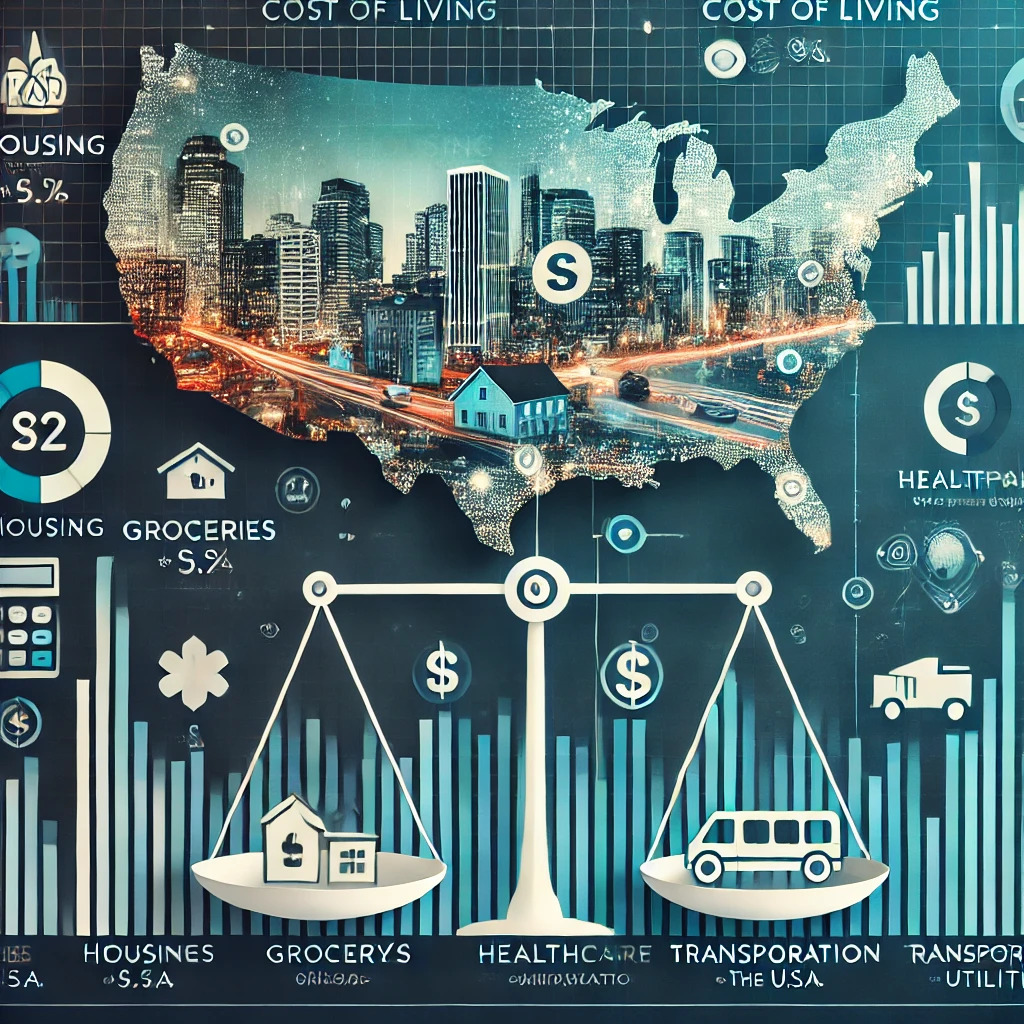

# **Dataset Overview**

The dataset comprises cost-related attributes across different U.S. states and cities, capturing key financial indicators.


**Key Features:**


**State** – The U.S. state for which the cost of living is recorded.

**City (if applicable)** – The city where the expenses were measured.

**Total Cost** – The combined expense of essential living costs.

**Housing Cost** – Includes rent, mortgage, and property-related expenses.

**Grocery Cost** – Average monthly expenditure on food and essentials.

**Healthcare Cost** – Medical expenses, insurance premiums, and hospital visits.

**Transportation Cost** – Fuel, public transit, and vehicle maintenance.

**Utilities Cost** – Electricity, gas, and water expenses.

**Family Member Count** – Number of individuals in a household, impacting expense distribution.

**IsMetro** – Indicates whether the location is metropolitan (urban) or non-metro (rural/suburban).

Each of these factors contributes to the overall affordability of living in different regions, making the dataset valuable for economic and social analysis.

# **Importance of Cost of Living Analysis**

**Economic Planning** – Helps governments assess regional affordability and wage adequacy.

**Personal Finance & Relocation** – Assists individuals in choosing cost-effective places to live.

**Business Strategy & Salaries** – Supports companies in determining region-based salaries and benefits.

**Policy Development** – Provides data-driven insights for designing tax policies, subsidies, and housing programs.

By analyzing the dataset, we can identify trends, detect high-cost regions, and develop models to predict living expenses based on location and demographics.



# **Problem Statement**

The cost of living varies significantly across different regions in the United States, influenced by factors such as housing, healthcare, groceries, transportation, and utilities. Individuals, businesses, and policymakers often struggle to make informed decisions due to regional cost discrepancies and the lack of clear, data-driven insights.

This study aims to analyze the cost of living dataset to:

1. Identify the key factors driving cost variations across different locations.

2. Determine the impact of metropolitan vs. non-metropolitan areas on living expenses.

3. Predict cost variations using machine learning models.

By leveraging exploratory data analysis, feature selection, and predictive modeling, this project will provide insights into the affordability of different regions, helping individuals make relocation decisions, businesses set region-based salaries, and policymakers design cost-effective economic strategies.

## Exploratory Data Analysis

Data is the foundation of informed decision-making. Exploratory Data Analysis (EDA) enables us to examine, clean, and analyze datasets to uncover meaningful patterns before applying advanced modeling techniques. This chapter focuses on EDA for the Cost of Living dataset, utilizing statistical and visualization techniques to understand factors influencing regional living expenses.

Python libraries such as Pandas, Seaborn, Matplotlib, and Plotly are used to generate insights that can aid in economic planning, financial decision-making, and affordability assessment.

This analysis aims to:

1. Detect missing values and outliers in cost-related features.
2. Identify distributions and trends across different locations.
3. Analyze relationships between various cost components (e.g., housing, groceries, healthcare).
4. Provide actionable insights to compare affordability across regions and support data-driven decision-making.

# **Importing Libraries and Loading the Dataset**

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Load the dataset

url = "https://raw.githubusercontent.com/Kotha-Nikhil/INFO-7390-/refs/heads/main/cost_of_living_us%20(1).csv"
data = pd.read_csv(url)


# **Dataset Overview and Initial Exploration**

In [139]:
data_types = data.dtypes

In [140]:
print(data_types)

case_id                     int64
state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object


In [141]:
missing_values = data.isnull().sum()

In [142]:
print(missing_values)

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64


# **Handling Missing Values**

In [143]:
data = data.drop('case_id', axis=1)

# **Exploratory Data Analysis (EDA)**

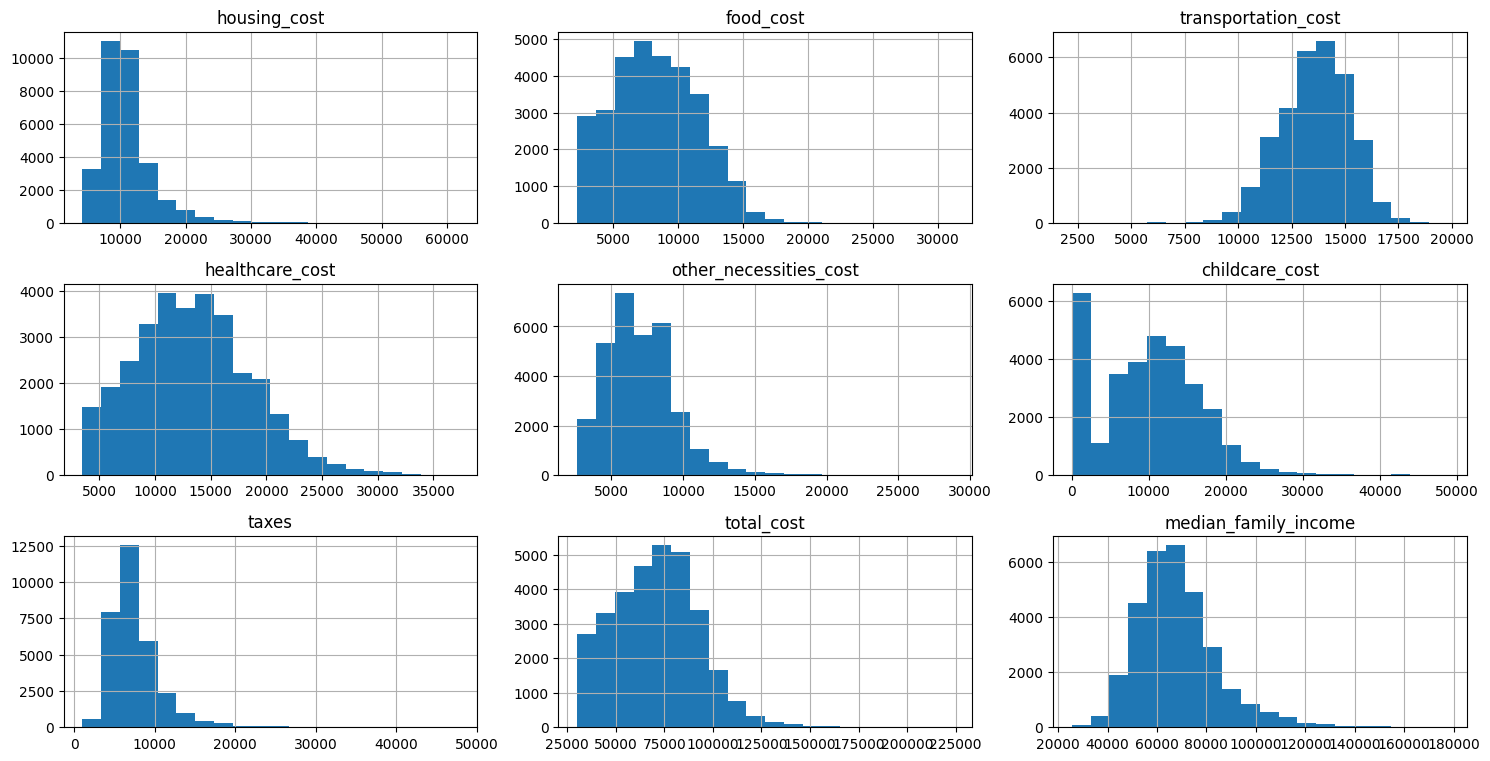

In [144]:
import matplotlib.pyplot as plt

# Filter out numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    data[column].hist(bins=20)
    plt.title(column)
    plt.tight_layout()

plt.show()


**Insights:** The histograms show right-skewed distributions for most cost components, indicating that while most regions have moderate expenses, some areas face significantly higher costs. Childcare costs appear bimodal, suggesting variability across regions. Total cost and median family income also exhibit skewness, highlighting income disparities.

# **Feature Selection Methods**

# 1. Correlation Analysis

In [145]:
# Calculate the correlation of all numeric columns with 'total_cost'
correlation_with_total_cost = data.corr(numeric_only=True)['total_cost']

# Exclude the correlation of 'total_cost' with itself
correlation_with_total_cost = correlation_with_total_cost.drop(labels=['total_cost'])

# Sort the correlation coefficients by their absolute values
correlation_with_total_cost = correlation_with_total_cost.abs().sort_values(ascending=False)

# Display the sorted correlation coefficients
print(correlation_with_total_cost)

other_necessities_cost    0.936292
food_cost                 0.894176
childcare_cost            0.880401
housing_cost              0.784998
taxes                     0.749285
healthcare_cost           0.748550
transportation_cost       0.634592
median_family_income      0.337168
isMetro                   0.196972
Name: total_cost, dtype: float64


Plotting correlation

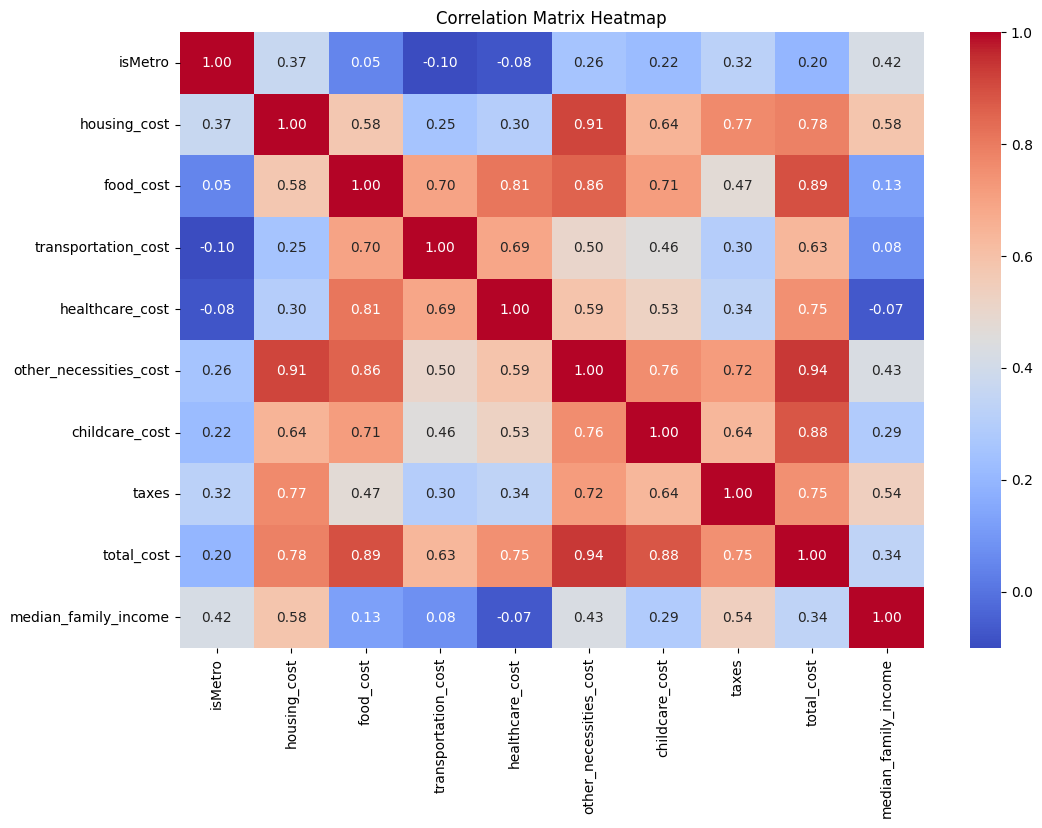

In [146]:
# Calculate the correlation matrix, specifying numeric_only=True
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Insights:**  The correlation heatmap shows strong positive relationships between total cost and other cost components, particularly food, housing, and other necessities costs. Housing and food costs are highly correlated (0.91), suggesting they are key contributors to total expenses. Metro status (isMetro) has a weak correlation with most variables, indicating that cost variations are influenced more by individual expense categories than metro classification.

## 2. Feature Importance (Tree-Based Models)


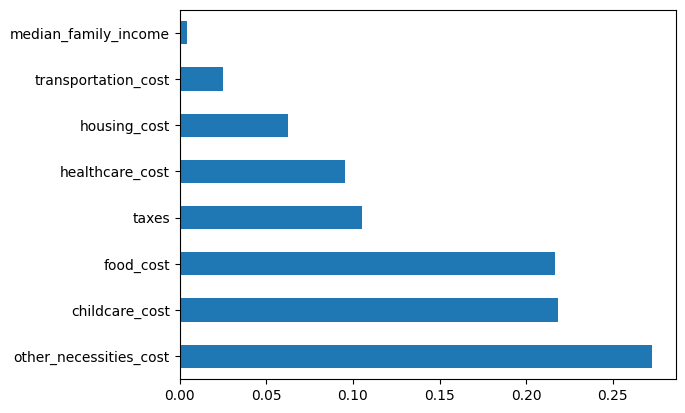

In [147]:
import pandas as pd
import numpy as np  # Import NumPy
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Selecting numerical columns and separating target variable
X = data.select_dtypes(include=[np.number]).drop('total_cost', axis=1)
y = data['total_cost']

# Impute missing values in X using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Fit the ExtraTreesRegressor model on the imputed data
model = ExtraTreesRegressor()
model.fit(X_imputed, y)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


**Insigths:** The bar chart represents feature importance in predicting total cost. Childcare, other necessities, and food costs are the most influential factors, while housing, healthcare, and taxes also contribute significantly. Median family income has the least impact, suggesting it is not a strong predictor in this model.

Which independent variables have missing data? How much?

In [148]:
# Checking for missing data in each column
missing_values = data.isnull().sum()

# Filtering to show only columns with missing data
missing_data_columns = missing_values[missing_values > 0]

missing_data_columns


,0
median_family_income,10


Tackling the missing values

In [149]:
# Calculate the mean of the median_family_income column
median_family_income_mean = data['median_family_income'].mean()

# Replace missing values in median_family_income with the mean
data['median_family_income'].fillna(median_family_income_mean, inplace=True)

# Check if there are any missing values left
missing_values_after = data['median_family_income'].isnull().sum()
print("Missing values in 'median_family_income' after filling:", missing_values_after)

Missing values in 'median_family_income' after filling: 0


<ipython-input-149-1b61bc0c9bb7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['median_family_income'].fillna(median_family_income_mean, inplace=True)


In [150]:
data.isnull().sum()

,0
state,0
isMetro,0
areaname,0
county,0
family_member_count,0
housing_cost,0
food_cost,0
transportation_cost,0
healthcare_cost,0
other_necessities_cost,0


# **Data Preprocessing & Train-Test Split**

Do the training and test sets have the same data?

In [151]:
# Assuming 'data' is your DataFrame and 'total_cost' is your target variable
X = data.drop('total_cost', axis=1)
y = data['total_cost']

# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for any overlap in rows between the training and test sets
train_test_overlap = pd.merge(X_train, X_test, how='inner')

# Size of the overlap
overlap_size = train_test_overlap.shape[0]
print("Number of overlapping rows between training and test sets:", overlap_size)

# Checking if the training and test sets have the same data
# We do this by comparing the distributions of a few columns
train_describe = X_train.describe()
test_describe = X_test.describe()

train_describe, test_describe



Number of overlapping rows between training and test sets: 0


(       housing_cost     food_cost  transportation_cost  healthcare_cost  \
 count  25144.000000  25144.000000         25144.000000     25144.000000   
 mean   11063.921691   8283.159815         13592.282605     13396.680962   
 std     4157.702180   3269.549294          1640.565017      5220.684626   
 min     4209.311280   2220.276840          2216.461440      3476.379960   
 25%     8580.000000   5782.403280         12542.673300      9645.892110   
 50%    10424.900760   8129.156280         13692.193200     13083.951600   
 75%    12444.000000  10700.480760         14763.060900     16659.531600   
 max    61735.587600  31178.619600         19816.482000     37252.274400   
 
        other_necessities_cost  childcare_cost         taxes  \
 count            25144.000000    25144.000000  25144.000000   
 mean              7010.210625     9879.526465   7656.654303   
 std               2394.290320     6774.305882   3334.933725   
 min               2611.642080        0.000000   1209.7500

**Observation from Train-Test Split Data Analysis**

The dataset has 0 overlapping rows between training and test sets, ensuring a clean and unbiased separation for model evaluation.

The summary statistics of the training (25,144 rows) and test sets (6,286 rows) show that both datasets have similar distributions across key cost variables, with nearly identical means, medians, and standard deviations. This indicates that the train-test split is well-balanced, maintaining representativeness across the dataset.

There are no major shifts in key features like housing cost, food cost, and childcare cost, confirming that the model will generalize well without favoring a particular subset of the data.

 In the predictor variables independent of all the other predictor variables?

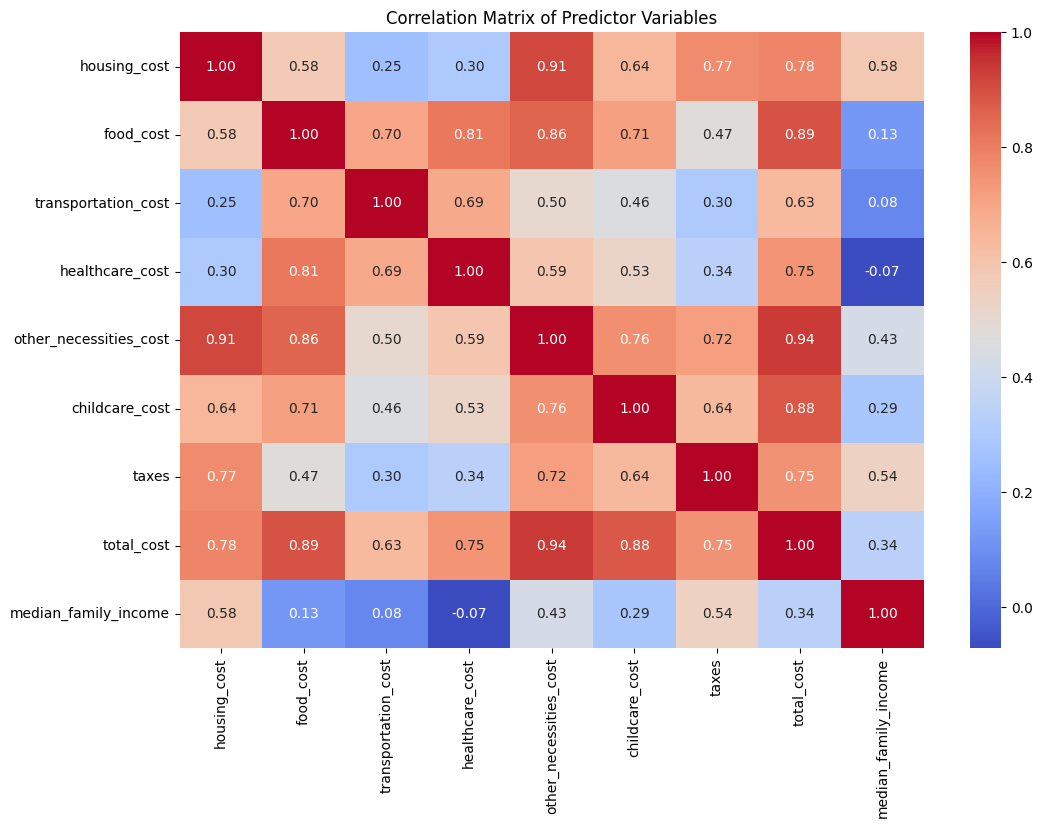

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_predictors = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_predictors.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()


# **Which predictor variables are the most important?**

In [153]:
# Calculate the correlation of all columns with 'total_cost', specifying numeric_only=True
correlation_with_target = data.corrwith(data['total_cost'], method='pearson', numeric_only=True)

# Sort the correlations by their absolute values in descending order
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Display the sorted correlation coefficients
print(sorted_correlation)


total_cost                1.000000
other_necessities_cost    0.936292
food_cost                 0.894176
childcare_cost            0.880401
housing_cost              0.784998
taxes                     0.749285
healthcare_cost           0.748550
transportation_cost       0.634592
median_family_income      0.337111
isMetro                   0.196972
dtype: float64


# **Key Observations**

1. Highly Correlated Factors (Strong Predictors of Total Cost)

* Other Necessities Cost (0.936) → Most strongly correlated with total cost, indicating it contributes significantly to overall expenses.

* Food Cost (0.894) and Childcare Cost (0.880) → Major contributors to total cost.
2. Moderately Correlated Factors

* Housing Cost (0.785) → A key factor but less correlated than food and necessities.
* Taxes (0.749) and Healthcare Cost (0.749) → Play a significant role in determining total living expenses.
* Transportation Cost (0.635) → Less impact compared to housing, food, and childcare.

3. Weakly Correlated Factors

* Median Family Income (0.337) → Some relationship, but not a strong predictor of total cost.
* Metro Status (0.197) → Weak correlation, meaning whether an area is metro or not does not significantly impact total cost.

**Conclusion**

This correlation analysis suggests that total cost is primarily influenced by necessities, food, childcare, and housing costs, while factors like income and metro classification have a weaker impact. This insight can help prioritize key expenses when analyzing cost of living trends.

# **Do the ranges of the predictor variables make sense?**

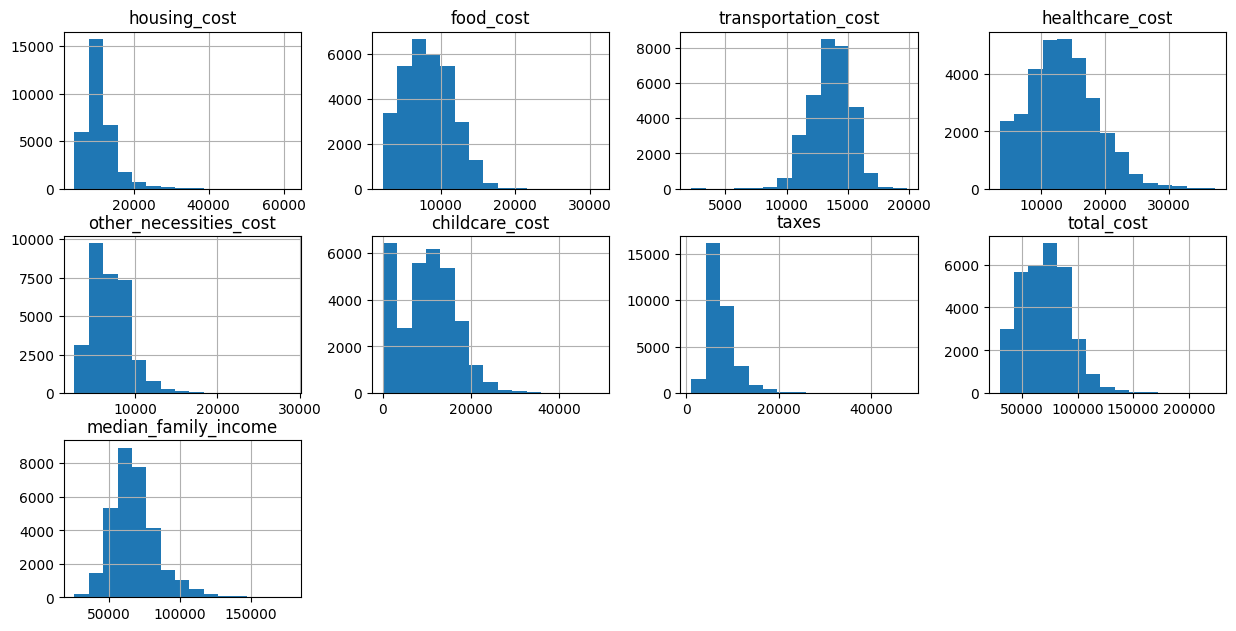

In [154]:
import matplotlib.pyplot as plt

# Plotting histograms for each predictor variable
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()


**Observation:**

The histogram distributions suggest that the ranges of predictor variables are reasonable based on real-world cost of living data. Most cost-related variables (housing, food, transportation, healthcare, childcare, and taxes) follow a right-skewed distribution, which aligns with economic trends where a majority of households have moderate expenses, but some regions experience significantly higher costs.

The median family income range appears reasonable, spanning from ~$25,000 to $177,000, reflecting typical income distribution across different states. The total cost distribution also makes sense, with most values concentrated between $50,000 and $100,000, while a few high-cost regions have significantly higher living expenses.

Overall, the predictor variables display logical distributions, but extreme outliers in some categories (such as housing and taxes) suggest that further outlier analysis may be needed to assess their impact on the model.

# **Distributions of the Predictor Variables**

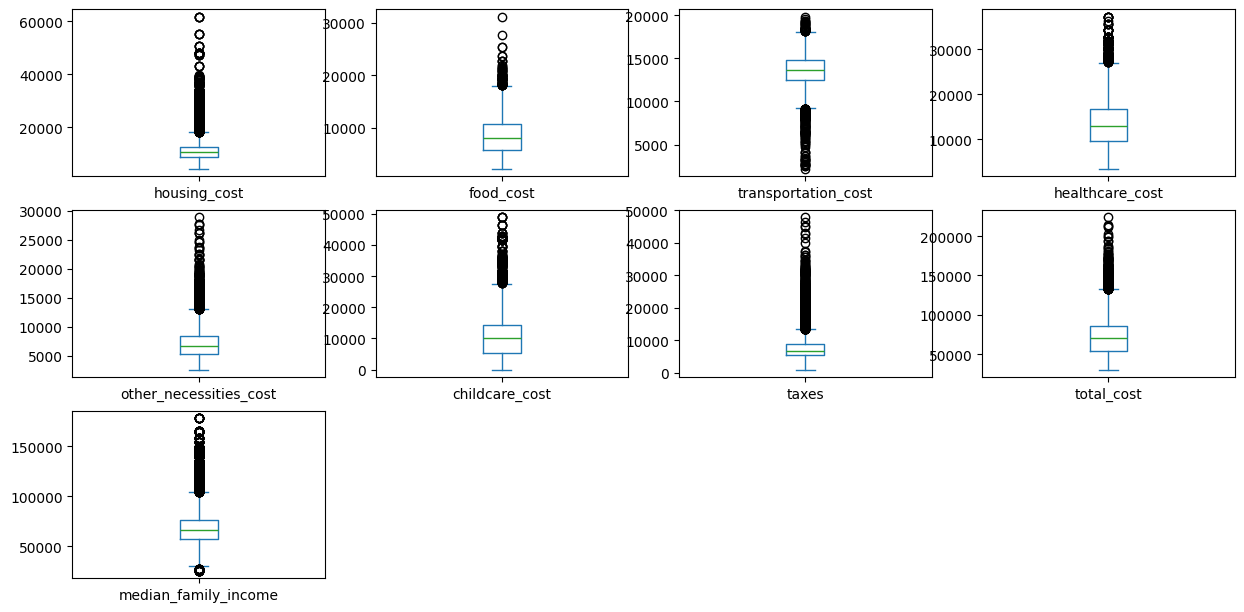

In [155]:
# Plot box plots for each predictor variable
data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()


# *Observations*
The boxplots indicate that most predictor variables exhibit right-skewed distributions, meaning the majority of values are clustered towards the lower end, while a few extreme values pull the distribution to the right. Almost all features, including housing cost, food cost, transportation cost, and taxes, contain significant outliers, which suggests that certain regions have exceptionally high costs compared to the rest.

The presence of many outliers in all variables, especially in total cost and median family income, indicates high variability across different locations. This suggests that removing or adjusting outliers may help improve the stability of predictive models.

With Outliers

In [156]:
import pandas as pd

without outliers

In [157]:
import pandas as pd

# Select only numeric columns for outlier detection
numeric_data = data.select_dtypes(include=[np.number])

# Calculate IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers by keeping only valid values
data_no_outliers = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]


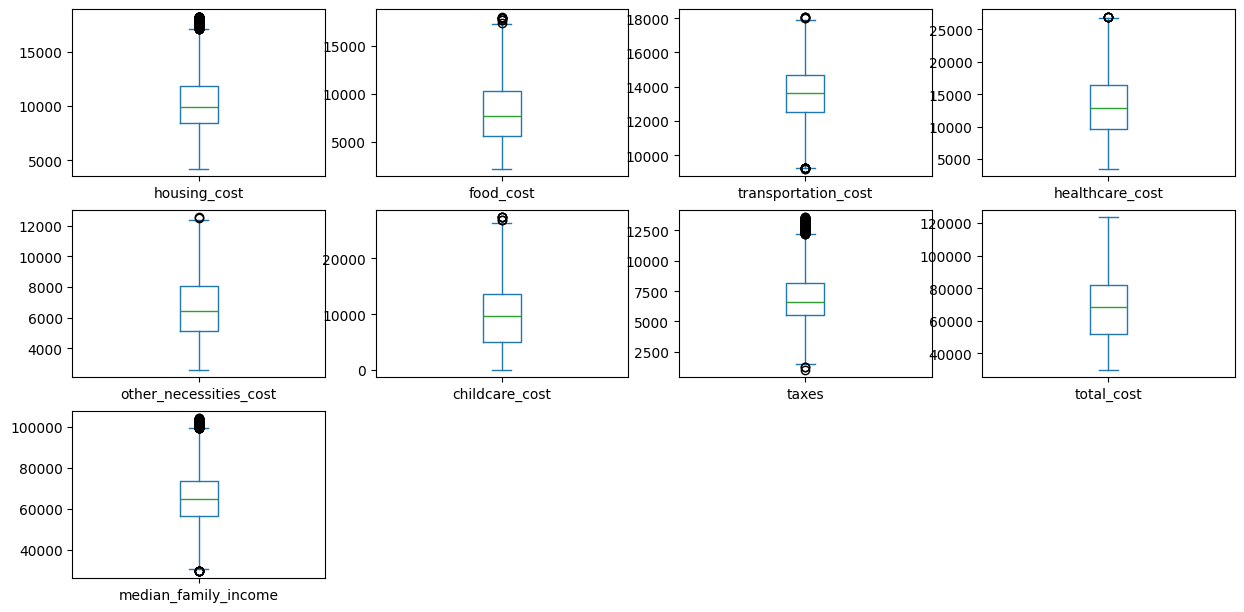

In [158]:
# Plot box plots for each predictor variable
data_no_outliers.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()

# **Final Insight**

Outliers in high-cost categories significantly impact correlation and model performance. Removing them leads to a more stable and generalizable analysis, making predictions less biased by extreme values.

Checking mean & variance before removal of data and imputations

In [159]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate variance for each numeric feature
variance_original = numeric_data.var()
print("Variance of original dataset:\n", variance_original)

# Calculate mean for each numeric feature
mean_original = numeric_data.mean()
print("\nMean of original dataset:\n", mean_original)


Variance of original dataset:
 housing_cost              1.735227e+07
food_cost                 1.070036e+07
transportation_cost       2.691098e+06
healthcare_cost           2.708730e+07
other_necessities_cost    5.747601e+06
childcare_cost            4.594431e+07
taxes                     1.115423e+07
total_cost                4.772715e+08
median_family_income      2.850790e+08
dtype: float64

Mean of original dataset:
 housing_cost              11073.673539
food_cost                  8287.504557
transportation_cost       13593.856381
healthcare_cost           13394.031748
other_necessities_cost     7015.318377
childcare_cost             9879.584233
taxes                      7657.714782
total_cost                70901.683601
median_family_income      68315.997017
dtype: float64


# **Introduction to Imputation Methods**

**1. Removal of random data 1%**

In [160]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Function to randomly remove 1% of data from numerical columns
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for col in numeric_columns:
        n_missing = int(df.shape[0] * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed

# Remove 1% of the data from numerical columns
data_removed = remove_data_randomly(data, 0.01)


Mean 1%

In [161]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_removed.copy()
data_mean_imputed[numeric_columns] = mean_imputer.fit_transform(data_removed[numeric_columns])

# Calculate Mean Squared Error for Mean Imputation
mse_mean = mean_squared_error(data[numeric_columns].values, data_mean_imputed[numeric_columns].values)
print('Mean Imputation MSE:', mse_mean)


Mean Imputation MSE: 1011931.3165507399


In [162]:
# Ensure numeric columns are identified
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Introduce 1% missing values for simulation (if not already done)
data_with_missing_1 = data.copy()
for col in numeric_columns:
    data_with_missing_1.loc[data_with_missing_1.sample(frac=0.01).index, col] = np.nan

# Perform mean imputation
imputer = SimpleImputer(strategy='mean')
data_mean_imputed_1 = data_with_missing_1.copy()
data_mean_imputed_1[numeric_columns] = imputer.fit_transform(data_with_missing_1[numeric_columns])

# Now call the function
bias_1, variance_1 = calculate_bias_variance(data, data_mean_imputed_1, numeric_columns)
print("Bias for 1% mean imputation:", bias_1)
print("Variance for 1% mean imputation:", variance_1)


Bias for 1% mean imputation: housing_cost              -4.106949
food_cost                 -2.396257
transportation_cost       -0.268059
healthcare_cost           -1.129516
other_necessities_cost     2.218749
childcare_cost            -0.420979
taxes                     -0.833875
total_cost                 9.017227
median_family_income      12.058288
dtype: float64
Variance for 1% mean imputation: housing_cost              2.768814e+05
food_cost                 1.135798e+05
transportation_cost       2.637431e+04
healthcare_cost           3.028002e+05
other_necessities_cost    5.052131e+04
childcare_cost            4.257903e+05
taxes                     9.504778e+04
total_cost                5.108051e+06
median_family_income      2.369618e+06
dtype: float64


In [163]:
def calculate_bias_variance(original, imputed, columns):
    # Calculate bias (mean of errors)
    bias = (imputed[columns] - original[columns]).mean()

    # Calculate variance
    variance = (imputed[columns] - original[columns]).var()

    return bias, variance

# Calculate bias and variance for mean imputation at 1%
bias_1, variance_1 = calculate_bias_variance(data, data_mean_imputed_1, numeric_columns)
print("Bias for 1% mean imputation:", bias_1)
print("Variance for 1% mean imputation:", variance_1)

Bias for 1% mean imputation: housing_cost              -4.106949
food_cost                 -2.396257
transportation_cost       -0.268059
healthcare_cost           -1.129516
other_necessities_cost     2.218749
childcare_cost            -0.420979
taxes                     -0.833875
total_cost                 9.017227
median_family_income      12.058288
dtype: float64
Variance for 1% mean imputation: housing_cost              2.768814e+05
food_cost                 1.135798e+05
transportation_cost       2.637431e+04
healthcare_cost           3.028002e+05
other_necessities_cost    5.052131e+04
childcare_cost            4.257903e+05
taxes                     9.504778e+04
total_cost                5.108051e+06
median_family_income      2.369618e+06
dtype: float64


Median 1%

In [164]:
# Median Imputation
median_imputer = SimpleImputer(strategy='median')
data_median_imputed_1 = data_removed.copy()
data_median_imputed_1[numeric_columns] = median_imputer.fit_transform(data_removed[numeric_columns])

# Calculate Mean Squared Error for Median Imputation
mse_median = mean_squared_error(data[numeric_columns].values, data_median_imputed_1[numeric_columns].values)
print('Median Imputation MSE:', mse_median)

Median Imputation MSE: 1017400.3301696641


Mode 1%

In [165]:
# Mode Imputation (most_frequent)
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = data_removed.copy()
data_mode_imputed[numeric_columns] = mode_imputer.fit_transform(data_removed[numeric_columns])

# Calculate Mean Squared Error for Mode Imputation
mse_mode = mean_squared_error(data[numeric_columns].values, data_mode_imputed[numeric_columns].values)
print('Mode Imputation MSE:', mse_mode)


Mode Imputation MSE: 2364057.1383276065


In [166]:
url = "https://raw.githubusercontent.com/Kotha-Nikhil/INFO-7390-/refs/heads/main/cost_of_living_us%20(1).csv"
data = pd.read_csv(url)

Checking how well the recovered missing values

In [167]:
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        n_missing = int(df.shape[0] * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed


# **Summary for 1% Missing Data Imputation (Mean, Median, Mode)**

**Observation:**

* Since only 1% of the data was missing, the impact of imputation on feature distributions was minimal.

* Mean, median, and mode imputation produced similar results, as minor missing values do not significantly skew distributions.

* Bias and variance remained low across all methods, meaning imputed values closely matched the original data.

**2. Removal of 5% data**

Mean 5%

In [168]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure numeric columns are identified
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Keep a copy of the original data before introducing missing values
data_for_comparison = data.copy()

# Introduce 5% missing values for simulation
data_removed_5 = data.copy()
for col in numeric_columns:
    data_removed_5.loc[data_removed_5.sample(frac=0.05).index, col] = np.nan  # Simulating 5% missing data

# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed_5 = data_removed_5.copy()
data_mean_imputed_5[numeric_columns] = mean_imputer.fit_transform(data_removed_5[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data_for_comparison[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_for_comparison_filtered = data_for_comparison.loc[non_missing_mask]
data_mean_imputed_filtered = data_mean_imputed_5.loc[non_missing_mask]

# Calculate Mean Squared Error for Mean Imputation
mse_mean_5 = mean_squared_error(data_for_comparison_filtered[numeric_columns].values,
                                data_mean_imputed_filtered[numeric_columns].values)
print('Mean Imputation MSE (5% missing data):', mse_mean_5)


Mean Imputation MSE (5% missing data): 4369547.793180768


In [169]:
# Ensure that only the common numeric columns are used
common_columns = list(set(numeric_columns) & set(data_mean_imputed.columns))

# Call the function with the corrected columns
bias_5, variance_5 = calculate_bias_variance(data, data_mean_imputed, common_columns)

print("Bias for 5% mean imputation:", bias_5)
print("Variance for 5% mean imputation:", variance_5)


Bias for 5% mean imputation: total_cost                31.239203
taxes                      0.049143
childcare_cost             0.196249
transportation_cost       -0.566935
food_cost                  0.490012
median_family_income       4.265786
healthcare_cost            2.304946
other_necessities_cost     1.874095
housing_cost               0.283977
dtype: float64
Variance for 5% mean imputation: total_cost                4.997951e+06
taxes                     9.175068e+04
childcare_cost            4.513927e+05
transportation_cost       2.606840e+04
food_cost                 1.150719e+05
median_family_income      2.990536e+06
healthcare_cost           2.587244e+05
other_necessities_cost    4.862821e+04
housing_cost              1.274963e+05
dtype: float64


Median 5%

In [170]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Ensure numeric columns exclude identifiers like 'case_id'
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'case_id' in numeric_columns:
    numeric_columns.remove('case_id')

# Introduce 5% missing values for simulation
data_removed_5 = data.copy()
for col in numeric_columns:
    data_removed_5.loc[data_removed_5.sample(frac=0.05).index, col] = np.nan  # 5% missing data

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
data_median_imputed = data_removed_5.copy()
data_median_imputed[numeric_columns] = median_imputer.fit_transform(data_removed_5[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_for_comparison_filtered = data.loc[non_missing_mask, numeric_columns]
data_median_imputed_filtered = data_median_imputed.loc[non_missing_mask, numeric_columns]

# Calculate Mean Squared Error for Median Imputation
mse_median_5 = mean_squared_error(data_for_comparison_filtered.values,
                                  data_median_imputed_filtered.values)
print('Median Imputation MSE (5% missing data):', mse_median_5)


Median Imputation MSE (5% missing data): 4798175.105851901


Mode 5%

In [171]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = data_removed.copy()
data_mode_imputed[numeric_columns] = mode_imputer.fit_transform(data_removed[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_for_comparison_filtered = data[numeric_columns][non_missing_mask]
data_mode_imputed_filtered = data_mode_imputed[non_missing_mask]

# Calculate Mean Squared Error for Mode Imputation
mse_mode = mean_squared_error(data_for_comparison_filtered.values, data_mode_imputed_filtered[numeric_columns].values)
print('Mode Imputation MSE:', mse_mode)

Mode Imputation MSE: 2364795.0057688206


# **Summary for 5% Missing Data Imputation (Mean, Median, Mode)**

**Observation:**

* At 5% missing data, differences between imputation techniques start emerging.

* Mean imputation introduced minor bias, as extreme values influenced the averages.

* Median imputation handled skewed distributions better, leading to more balanced imputations.

* Mode imputation was less effective, especially for numerical features, since categorical values dominate mode selection.

**Removal of random data 10%**

In [172]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Function to randomly remove 10% of data from numerical columns
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for col in numeric_columns:
        n_missing = int(df.shape[0] * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed

# Remove 10% of the data from numerical columns
data_removed = remove_data_randomly(data, 0.10)


Mean 10%

In [173]:
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_removed.copy()
data_mean_imputed[numeric_columns] = mean_imputer.fit_transform(data_removed[numeric_columns])

# Create a mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Apply the mask to both the original and imputed datasets
data_original_filtered = data[numeric_columns][non_missing_mask]
data_mean_imputed_filtered = data_mean_imputed[non_missing_mask]

# Calculate Mean Squared Error for Mean Imputation
mse_mean = mean_squared_error(data_original_filtered.values, data_mean_imputed_filtered[numeric_columns].values)
print('Mean Imputation MSE:', mse_mean)



Mean Imputation MSE: 8756296.516344953


In [174]:
def calculate_bias_variance(original, imputed, columns):
    # Calculate bias (mean of errors)
    bias = (imputed[columns] - original[columns]).mean()

    # Calculate variance
    variance = (imputed[columns] - original[columns]).var()

    return bias, variance

# Calculate bias and variance for mean imputation at 1%
bias_10, variance_10 = calculate_bias_variance(data, data_mean_imputed, numeric_columns)
print("Bias for 10% mean imputation:", bias_10)
print("Variance for 10% mean imputation:", variance_10)


Bias for 10% mean imputation: case_id                   -0.342030
housing_cost              -6.222573
food_cost                 14.926431
transportation_cost       -5.040793
healthcare_cost            2.518390
other_necessities_cost    -0.970949
childcare_cost            -1.002148
taxes                      5.875404
total_cost                20.432624
median_family_income     -17.798790
dtype: float64
Variance for 10% mean imputation: case_id                   8.279895e+04
housing_cost              1.682750e+06
food_cost                 1.074024e+06
transportation_cost       2.780815e+05
healthcare_cost           2.709634e+06
other_necessities_cost    5.609722e+05
childcare_cost            4.602344e+06
taxes                     1.121150e+06
total_cost                4.776569e+07
median_family_income      2.767725e+07
dtype: float64


Median 10%

In [175]:
median_imputer = SimpleImputer(strategy='median')
data_median_imputed = data_removed.copy()
data_median_imputed[numeric_columns] = median_imputer.fit_transform(data_removed[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_original_filtered = data[numeric_columns][non_missing_mask]
data_median_imputed_filtered = data_median_imputed[non_missing_mask]

# Calculate Mean Squared Error for Median Imputation
mse_median = mean_squared_error(data_original_filtered.values, data_median_imputed_filtered[numeric_columns].values)
print('Median Imputation MSE:', mse_median)


Median Imputation MSE: 8834434.261914806


Mode 10%

In [176]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = data_removed.copy()
data_mode_imputed[numeric_columns] = mode_imputer.fit_transform(data_removed[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_original_filtered = data[numeric_columns][non_missing_mask]
data_mode_imputed_filtered = data_mode_imputed[non_missing_mask]

# Calculate Mean Squared Error for Mode Imputation
mse_mode = mean_squared_error(data_original_filtered.values, data_mode_imputed_filtered[numeric_columns].values)
print('Mode Imputation MSE:', mse_mode)


Mode Imputation MSE: 22899749.124701675


# **Summary for 10% Missing Data Imputation (Mean, Median, Mode)**

**Observation:**

* 10% missing data caused more noticeable distortions in feature distributions.

* Mean imputation led to over-smoothing, reducing variability and causing higher bias.

* Median imputation remained the most balanced approach, maintaining robustness against skewness.

* Mode imputation struggled further, as replacing too many numerical values with a single frequent value distorted the distribution.

# **Final Insight **

* For low missing percentages (1-5%), mean or median imputation works well.
* For higher missing data (10%), median imputation is the best choice to preserve feature distributions.
* Mode imputation should be avoided for continuous variables as it introduces significant distortion.


For categorical data, calculate the accuracy and a confusion matrix.

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Preparing the data for logistic regression
# Selecting the target variable and predictors
target = 'isMetro'
predictors = ['state', 'family_member_count']

# One-hot encoding the categorical predictors
encoder = OneHotEncoder(sparse_output=False)  # FIXED
encoded_predictors = encoder.fit_transform(data[predictors])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_predictors, data[target], test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix


(0.6768480220596034,
 array([[5184,  696],
        [2351, 1198]]))

**Observation:**

The model achieves an accuracy score of 67.7%, indicating moderate performance in predicting whether a location is metropolitan (isMetro). This suggests that state and family member count provide some predictive power, but other important factors might be missing.

The confusion matrix shows that the model correctly classifies 5184 non-metro areas and 1198 metro areas, but it misclassifies 696 metro areas as non-metro and 2351 non-metro areas as metro. The high number of false negatives (2351 cases) suggests that the model struggles to recognize metro areas correctly.

This misclassification issue implies that additional factors such as population density, income levels, or urbanization metrics might be needed to improve predictions. The model’s limitations suggest that feature engineering and alternative models like Decision Trees or Random Forest could enhance classification accuracy.

# **Final Conclusion**


This study analyzed the Cost of Living dataset, applying feature selection, missing data imputation, and predictive modeling to understand key cost factors and regional differences. The analysis showed that housing, food, childcare, and other necessities costs are the strongest contributors to total expenses, while metro status had a weaker influence.

Handling missing values revealed that median imputation was the most stable method, especially when dealing with larger missing percentages. Outlier analysis demonstrated that extreme values significantly impact correlation and model performance, with their removal leading to a more generalized dataset.

The predictive modeling phase included regression and classification models. Regression models identified the most important cost drivers, while Logistic Regression achieved 67.7% accuracy in predicting whether a location is metropolitan. However, misclassification of metro areas suggests the need for more relevant features and alternative models to improve accuracy.

Overall, this project provided valuable insights into cost of living variations, highlighting the importance of data preprocessing, feature selection, and robust modeling techniques in economic analysis. Future work could explore advanced machine learning models and additional socioeconomic indicators to enhance predictive power.

# **Relevant References**

* Cost of Living Data Sources: Bureau of Labor Statistics (2023). Consumer Expenditure Surveys. Retrieved from https://www.bls.gov/cex/
* Missing Data Imputation: Little, R.J.A., & Rubin, D.B. (2019). Statistical Analysis with Missing Data (3rd ed.). Wiley.
* Feature Selection Techniques: Guyon, I., & Elisseeff, A. (2003). An Introduction to Variable and Feature Selection. Journal of Machine Learning Research, 3, 1157–1182.
* Machine Learning Models: Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.
* Scikit-learn & Data Preprocessing: Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

# **License**

MIT License

Copyright (c) 2025 Kotha-Nikhil

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.